In [1]:
import wandb
import sys
import matplotlib.pyplot as plt
import scprep
import pandas as pd
sys.path.append('../src/')
from evaluate import get_results

In [2]:
# Initialize wandb (replace 'your_entity' and 'your_project' with your specific details)
wandb.login()
api = wandb.Api()

# Specify your entity, project, and sweep ID
entity = "xingzhis"
project = "dmae"
# sweep_id = "cnpdtv5t"
# sweep_id = 'zt4xeuwa'
sweep_id = '4fvcno8c'

# Fetch the sweep
sweep = api.sweep(f"{entity}/{project}/{sweep_id}")

run_ids = [run.id for run in sweep.runs]

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


wandb: Currently logged in as: xingzhis. Use `wandb login --relogin` to force relogin


In [3]:
# run_id = 'oeud5m9d'
# run_ids.append(run_id)

In [4]:
sweep_id = 'ztza804m'
sweep = api.sweep(f"{entity}/{project}/{sweep_id}")
for run in sweep.runs:
    run_ids.append(run.id)

In [5]:
# sweep_id = 'nbcoi2jr'
# sweep = api.sweep(f"{entity}/{project}/{sweep_id}")
# for run in sweep.runs:
#     run_ids.append(run.id)

In [6]:
res_list = []
for run_id in run_ids:
    run = api.run(f"{entity}/{project}/{run_id}")
    res, plots, cfg = get_results(run)
    res_list.append(
        dict(
            run_id=run_id,
            res=res,
            plots=plots,
            cfg=cfg
        )
    )

In [7]:
res_list

[{'run_id': 'zvfo4wox',
  'res': {'data': 'eb_subset',
   'preprocess': 'power',
   'kernel': None,
   'sigma': 0,
   'dist_recon_weight': [0.9, 0.1, 0],
   'model_type': 'ae',
   'dist_mape_test_test': 0.3878337461017292,
   'dist_mape_test_train': 0.3245625850826696,
   'dist_mape_test_overall': 0.33721681728648123,
   'dist_rmse_test_test': 0.005232412266883244,
   'dist_rmse_test_train': 0.004465735617883886,
   'test_rmse': 0.00282170587363162},
  'plots': {'phate_true': array([[-0.00436787,  0.00236444],
          [-0.01192684, -0.00110796],
          [-0.01669212,  0.00044402],
          ...,
          [-0.01183407, -0.00098639],
          [ 0.01977743,  0.00989683],
          [ 0.00509934, -0.01184323]]),
   'phate_pred': array([[-0.00368281, -0.00334552],
          [-0.01343474, -0.00134947],
          [-0.01972096, -0.00079532],
          ...,
          [-0.01053191, -0.00032134],
          [ 0.01171682,  0.01823939],
          [ 0.00556541, -0.01068432]]),
   'colors': array

In [8]:
res_list[0]['cfg']

{'data': {'name': 'eb_subset', 'root': '../data', 'filetype': '.npz', 'preprocess': 'power'}, 'path': {'log': '', 'root': '../results/', 'save': False, 'model': 'model', 'plots': '', 'out_data': '', 'procrustes': 'procrustes'}, 'model': {'lr': 0.001, 'type': 'ae', 'log_dist': True, 'kl_weight': 1, 'activation': 'relu', 'layer_widths': [256, 128, 64], 'dist_reconstr_weights': [0.9, 0.1, 0], 'dist_recon_topk_coords': 0}, 'logger': {'tags': ['default'], 'entity': 'xingzhis', 'project': 'dmae', 'use_wandb': True}, 'model.lr': 0.001, 'training': {'seed': 42, 'monitor': 'val_loss', 'shuffle': True, 'patience': 10, 'batch_size': 1024, 'max_epochs': 50, 'accelerator': 'cuda', 'match_potential': True, 'train_test_split': 0.8, 'log_every_n_steps': 100, 'train_valid_split': 0.8}, 'data.name': 'eb_subset', 'model.type': 'ae', 'data.preprocess': 'power', 'model.layer_widths': [256, 128, 64], 'model.dist_reconstr_weights': [0.9, 0.1, 0]}

In [22]:
res_eb = []
for res in res_list:
    cfg = res['cfg']
    try:
        if cfg['data']['name'] == 'eb_subset' and \
            cfg['data']['preprocess'] in ['none','kernel'] and \
            cfg['model']['type'] == 'ae' and \
            cfg['model']['dist_reconstr_weights'] == [0.9,0.1,0.] and \
            cfg['training']['match_potential'] == True:
            print(res['run_id'])
            res_eb.append(res)
    except:
        pass

fdl8sea6
e8sq91qt
jv9ynfbn
eqp7zh5t


In [23]:
for res in res_eb:
    print(res['res']['kernel'])

gaussian
gaussian
gaussian
gaussian


In [24]:
res['res']['sigma']

2

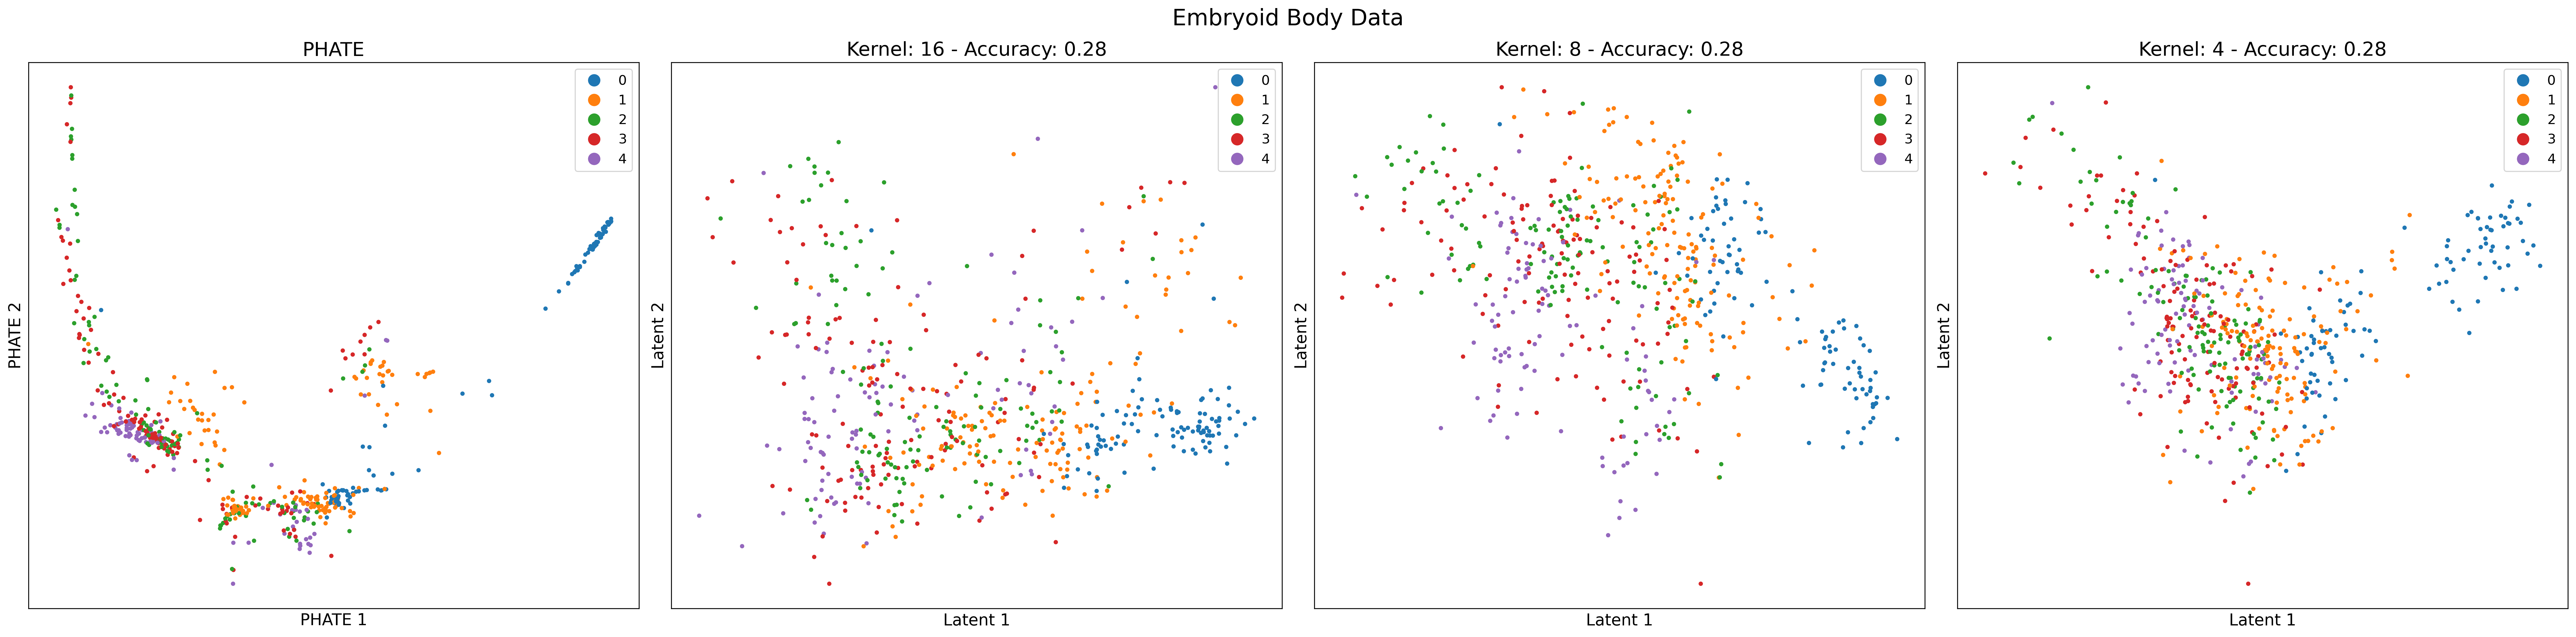

In [25]:
res_bar = []
for res in res_eb:
    # preprocessing = res['res']['kernel'] if res['res']['kernel'] is not None else 'none'
    preprocessing = res['res']['sigma']
    acc_all = 1 - res['res']['dist_mape_test_overall']
    acc_test_test = 1 - res['res']['dist_mape_test_test']
    acc_test_train = 1 - res['res']['dist_mape_test_train']
    res_bar.append(
        dict(
            preprocessing=preprocessing,
            acc_all=acc_all,
            acc_test_test=acc_test_test,
            acc_test_train=acc_test_train
        )
    )
res_bar = pd.DataFrame(res_bar)
res_plot = []
for res in res_eb:
    # preprocessing = res['res']['kernel'] if res['res']['kernel'] is not None else 'none'
    preprocessing = res['res']['sigma']
    res_plot.append(
        dict(
            preprocessing=preprocessing,
            acc_all= 1 - res['res']['dist_mape_test_overall'],
            plots=res['plots']
        )
    )
fig, axes = plt.subplots(1, len(res_plot), figsize=(len(res_plot) * 8, 8), dpi=300)  # Modify the number of subplots to 3, adjust the figsize, and set dpi to 300

res = res_plot[0]
scprep.plot.scatter2d(res['plots']['phate_true'], c=res['plots']['colors'], ax=axes[0], ticks=False, label_prefix="PHATE ", title='PHATE')

for i in range(len(res_plot) - 1):
    ax = axes[i+1]
    res = res_plot[i]
    scprep.plot.scatter2d(res['plots']['phate_pred'], c=res['plots']['colors'], ax=axes[i+1], ticks=False, label_prefix="Latent ", title=f'Kernel: {res["preprocessing"]} - Accuracy: {res["acc_all"]:0.2f}')
plt.suptitle(f"Embryoid Body Data", fontsize=20)
plt.tight_layout()
plt.show()

In [28]:
res_sea_ad = []
for res in res_list:
    cfg = res['cfg']
    try:
        if cfg['data']['name'] == 'sea_ad_gaba' and \
            cfg['data']['preprocess'] in ['none','kernel'] and \
            cfg['model']['type'] == 'ae' and \
            cfg['model']['dist_reconstr_weights'] == [0.9,0.1,0.] and \
            cfg['training']['match_potential'] == True:
            print(res['run_id'])
            res_sea_ad.append(res)
    except:
        pass

3lgyqhhw
77e6qvda
999cyjso
2q80su8l


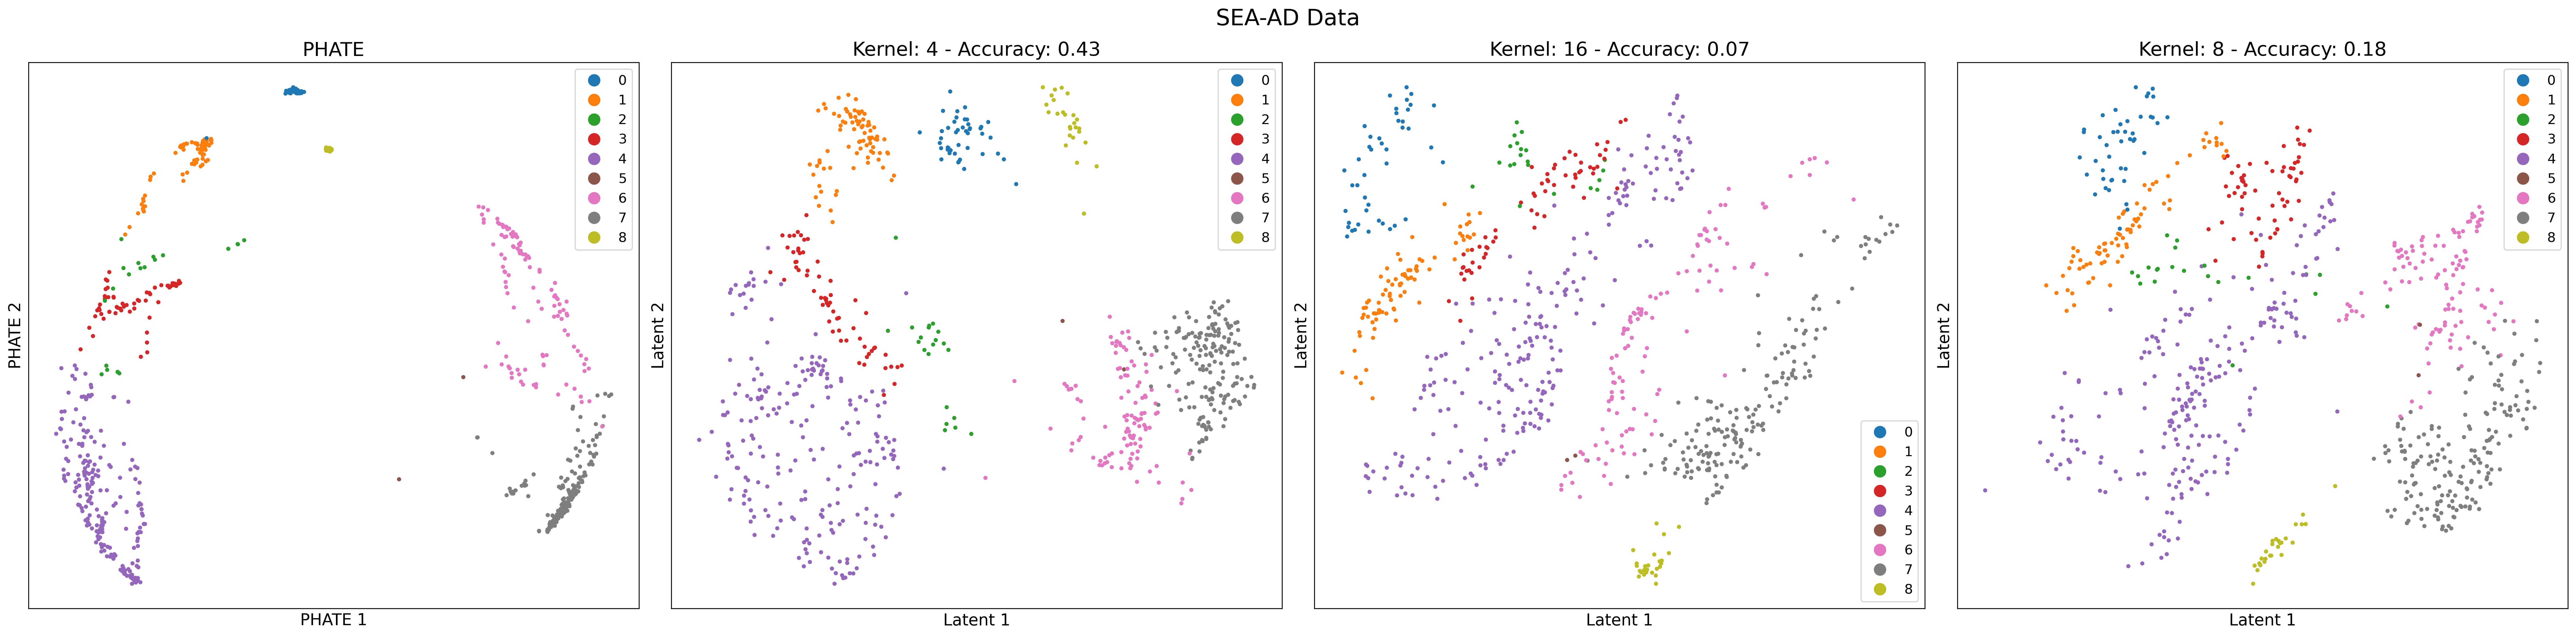

In [29]:
res_bar = []
for res in res_sea_ad:
    # preprocessing = res['res']['kernel'] if res['res']['kernel'] is not None else 'none'
    preprocessing = res['res']['sigma']
    acc_all = 1 - res['res']['dist_mape_test_overall']
    acc_test_test = 1 - res['res']['dist_mape_test_test']
    acc_test_train = 1 - res['res']['dist_mape_test_train']
    res_bar.append(
        dict(
            preprocessing=preprocessing,
            acc_all=acc_all,
            acc_test_test=acc_test_test,
            acc_test_train=acc_test_train
        )
    )
res_bar = pd.DataFrame(res_bar)
res_plot = []
for res in res_sea_ad:
    # preprocessing = res['res']['kernel'] if res['res']['kernel'] is not None else 'none'
    preprocessing = res['res']['sigma']
    res_plot.append(
        dict(
            preprocessing=preprocessing,
            acc_all= 1 - res['res']['dist_mape_test_overall'],
            plots=res['plots']
        )
    )
fig, axes = plt.subplots(1, len(res_plot), figsize=(len(res_plot) * 8, 8), dpi=300)  # Modify the number of subplots to 3, adjust the figsize, and set dpi to 300

res = res_plot[0]
scprep.plot.scatter2d(res['plots']['phate_true'], c=res['plots']['colors'], ax=axes[0], ticks=False, label_prefix="PHATE ", title='PHATE')

for i in range(len(res_plot) - 1):
    ax = axes[i+1]
    res = res_plot[i]
    scprep.plot.scatter2d(res['plots']['phate_pred'], c=res['plots']['colors'], ax=axes[i+1], ticks=False, label_prefix="Latent ", title=f'Kernel: {res["preprocessing"]} - Accuracy: {res["acc_all"]:0.2f}')
plt.suptitle(f"SEA-AD Data", fontsize=20)
plt.tight_layout()
plt.show()